## Next day rain prediction in Australia  - Machine learning Project 

**In this notebook, I work around the dataset I found on Kaggle which contains about 10 years of daily weather observations from many locations across Australia. I will attempt to predict whether it will rain tomorrow or not (Binary Classification Problem). I will firstly clean and prepare the data, explore several plots, and then use the methods of linear regression along with Decision Tree, Random classifiers, and other models from sklearn library.**

*Data: https://www.kaggle.com/jsphyg/weather-dataset-rattle-package*

In [42]:
# basic necessary libraries, will import sklearn later on
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Cleaning and preparing data

In [43]:
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [44]:
# how many missing values have we got?
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Text(0.5, 1.0, 'Missing Data')

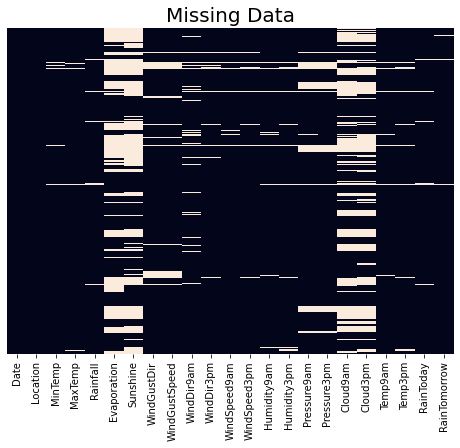

In [47]:
# how much is missing compare to our whole dataset?
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, xticklabels=True).set_title('Missing Data', size=20)

In [48]:
# Columns which has the most NaN values
df.isnull().sum().sort_values(ascending=False).head()

Sunshine       69835
Evaporation    62790
Cloud3pm       59358
Cloud9am       55888
Pressure9am    15065
dtype: int64

**Approximatly 50% of the data is missing in above columns, therefore it's not suitable to feature engineer and fill in those NaN values, so i will simply drop the top four**

In [49]:
df.drop(['Sunshine', 'Evaporation', 'Cloud3pm', 'Cloud9am'], axis=1, inplace=True)

<AxesSubplot:>

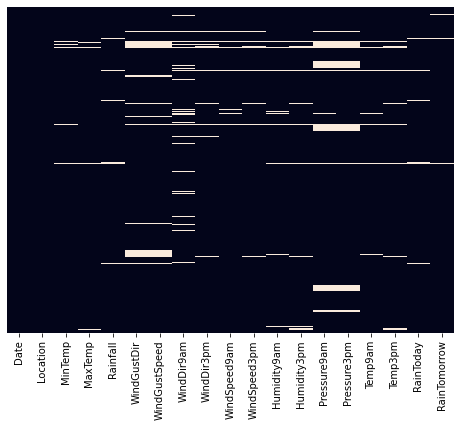

In [50]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, xticklabels=True)

In [51]:
# Now the most missing values are in Pressure columns. 
df.isnull().sum().sort_values(ascending=False).head()

Pressure9am      15065
Pressure3pm      15028
WindDir9am       10566
WindGustDir      10326
WindGustSpeed    10263
dtype: int64

In [52]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [53]:
# What is the range of pressure? 
print(df['Pressure3pm'].unique()[[0, -1]], df['Pressure9am'].unique()[[0, -1]],)

[1007.1  989.5] [1007.7  990.6]


**Since the ranges are reletivly small, i will fill its NaN values with average pressure.**

In [54]:
df['Pressure3pm'].fillna(np.mean(df['Pressure3pm']), inplace=True)
df['Pressure9am'].fillna(np.mean(df['Pressure9am']), inplace=True)

<AxesSubplot:>

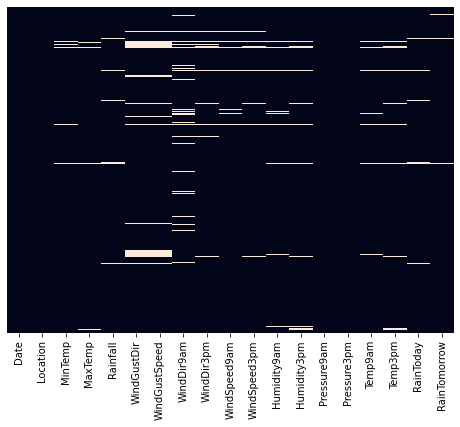

In [55]:
# Now we have enough NaN values to drop them all at once
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, xticklabels=True)

In [56]:
df.dropna(inplace=True)

<AxesSubplot:>

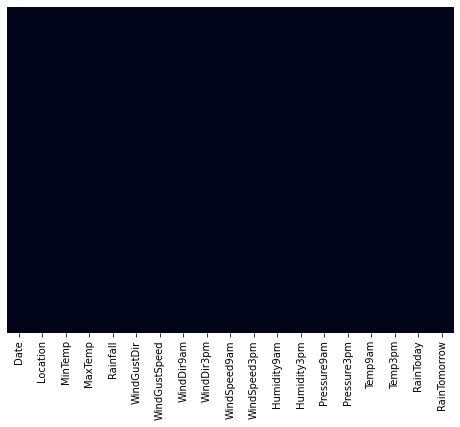

In [57]:
# No missing values:
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, xticklabels=True)

In [58]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


## EDA

In [59]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

<Axes:xlabel='MinTemp', ylabel='Density'>

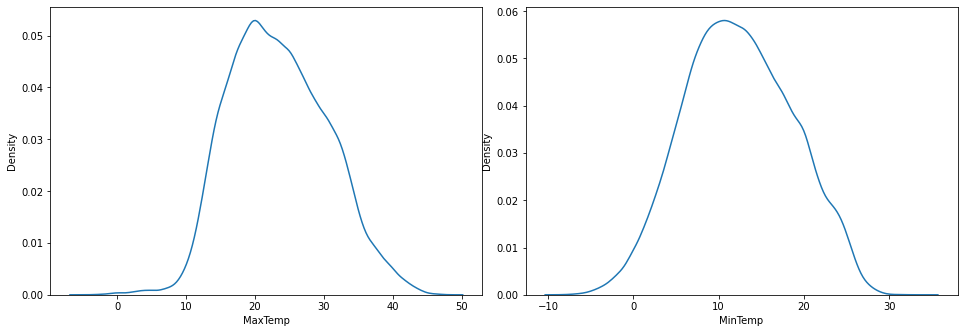

In [60]:
# Max and Min temperature distributions.  
fig = plt.figure()

ax1 = fig.add_axes([0, 0, 1, 1])
sns.kdeplot(df['MaxTemp'])

ax2 = fig.add_axes([1.10, 0, 1, 1])
sns.kdeplot(df['MinTemp'])

<AxesSubplot:xlabel='MaxTemp', ylabel='MinTemp'>

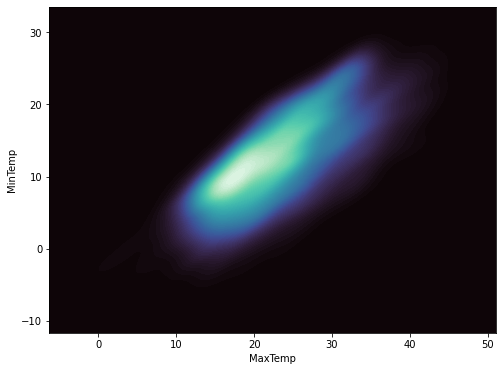

In [61]:
# What about combination of both (note: data points of only random sample of 10000 due to time consumption)?
plt.figure(figsize=(8, 6))
sns.kdeplot(
    data=df.sample(10000), x="MaxTemp", y="MinTemp",
    fill=True, thresh=0, levels=100, cmap="mako",
)

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

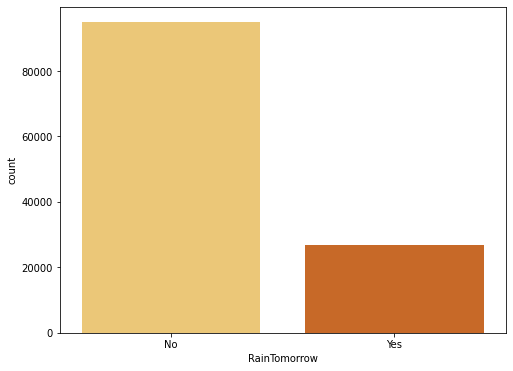

In [62]:
# How much has it rained tomorrow? 
plt.figure(figsize=(8, 6))
sns.countplot(x='RainTomorrow', data=df, palette='YlOrBr')

<Axes:xlabel='Temp9am', ylabel='Temp3pm'>

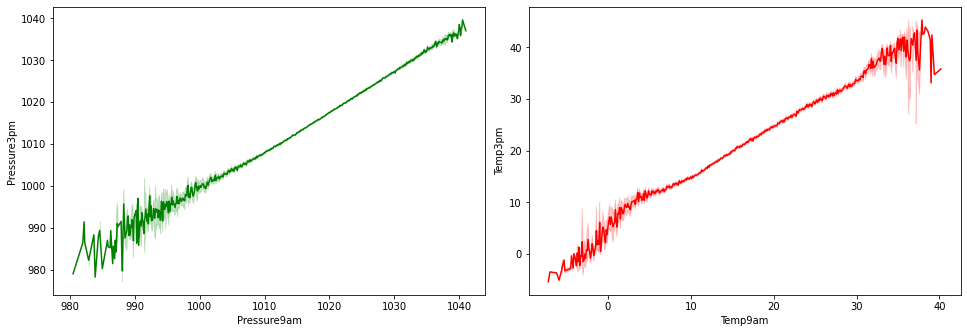

In [63]:
# Pressure and temperature should be relatively same in the morning and afternoon but let's confirm it. 
fig = plt.figure()

ax1 = fig.add_axes([0, 0, 1, 1])
sns.lineplot(data= df,x="Pressure9am",y="Pressure3pm",color = "green")

ax2 = fig.add_axes([1.10, 0, 1, 1])
sns.lineplot(data= df,x="Temp9am",y="Temp3pm",color = "red")

In [64]:
# I decided to keep month from the date column since I believe individual month somewhat contributes in deciding rain tomorrow. 
df['Month'] = df['Date'].str.split('-').str.get(1)

In [65]:
# Now that we have the month column, we can drop date
df.drop('Date', axis=1, inplace=True)

<AxesSubplot:xlabel='Month', ylabel='Rainfall'>

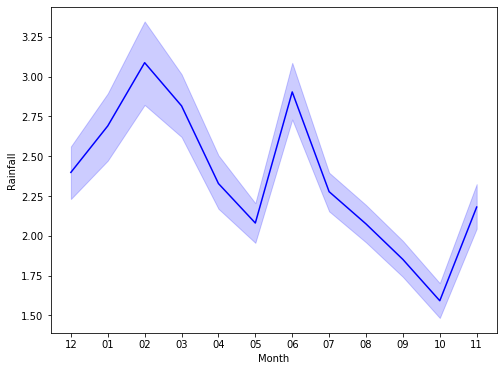

In [66]:
# What does Rainfall vs Month look like?
plt.figure(figsize=(8, 6))
sns.lineplot(data=df,x="Month",y="Rainfall",color = "blue")

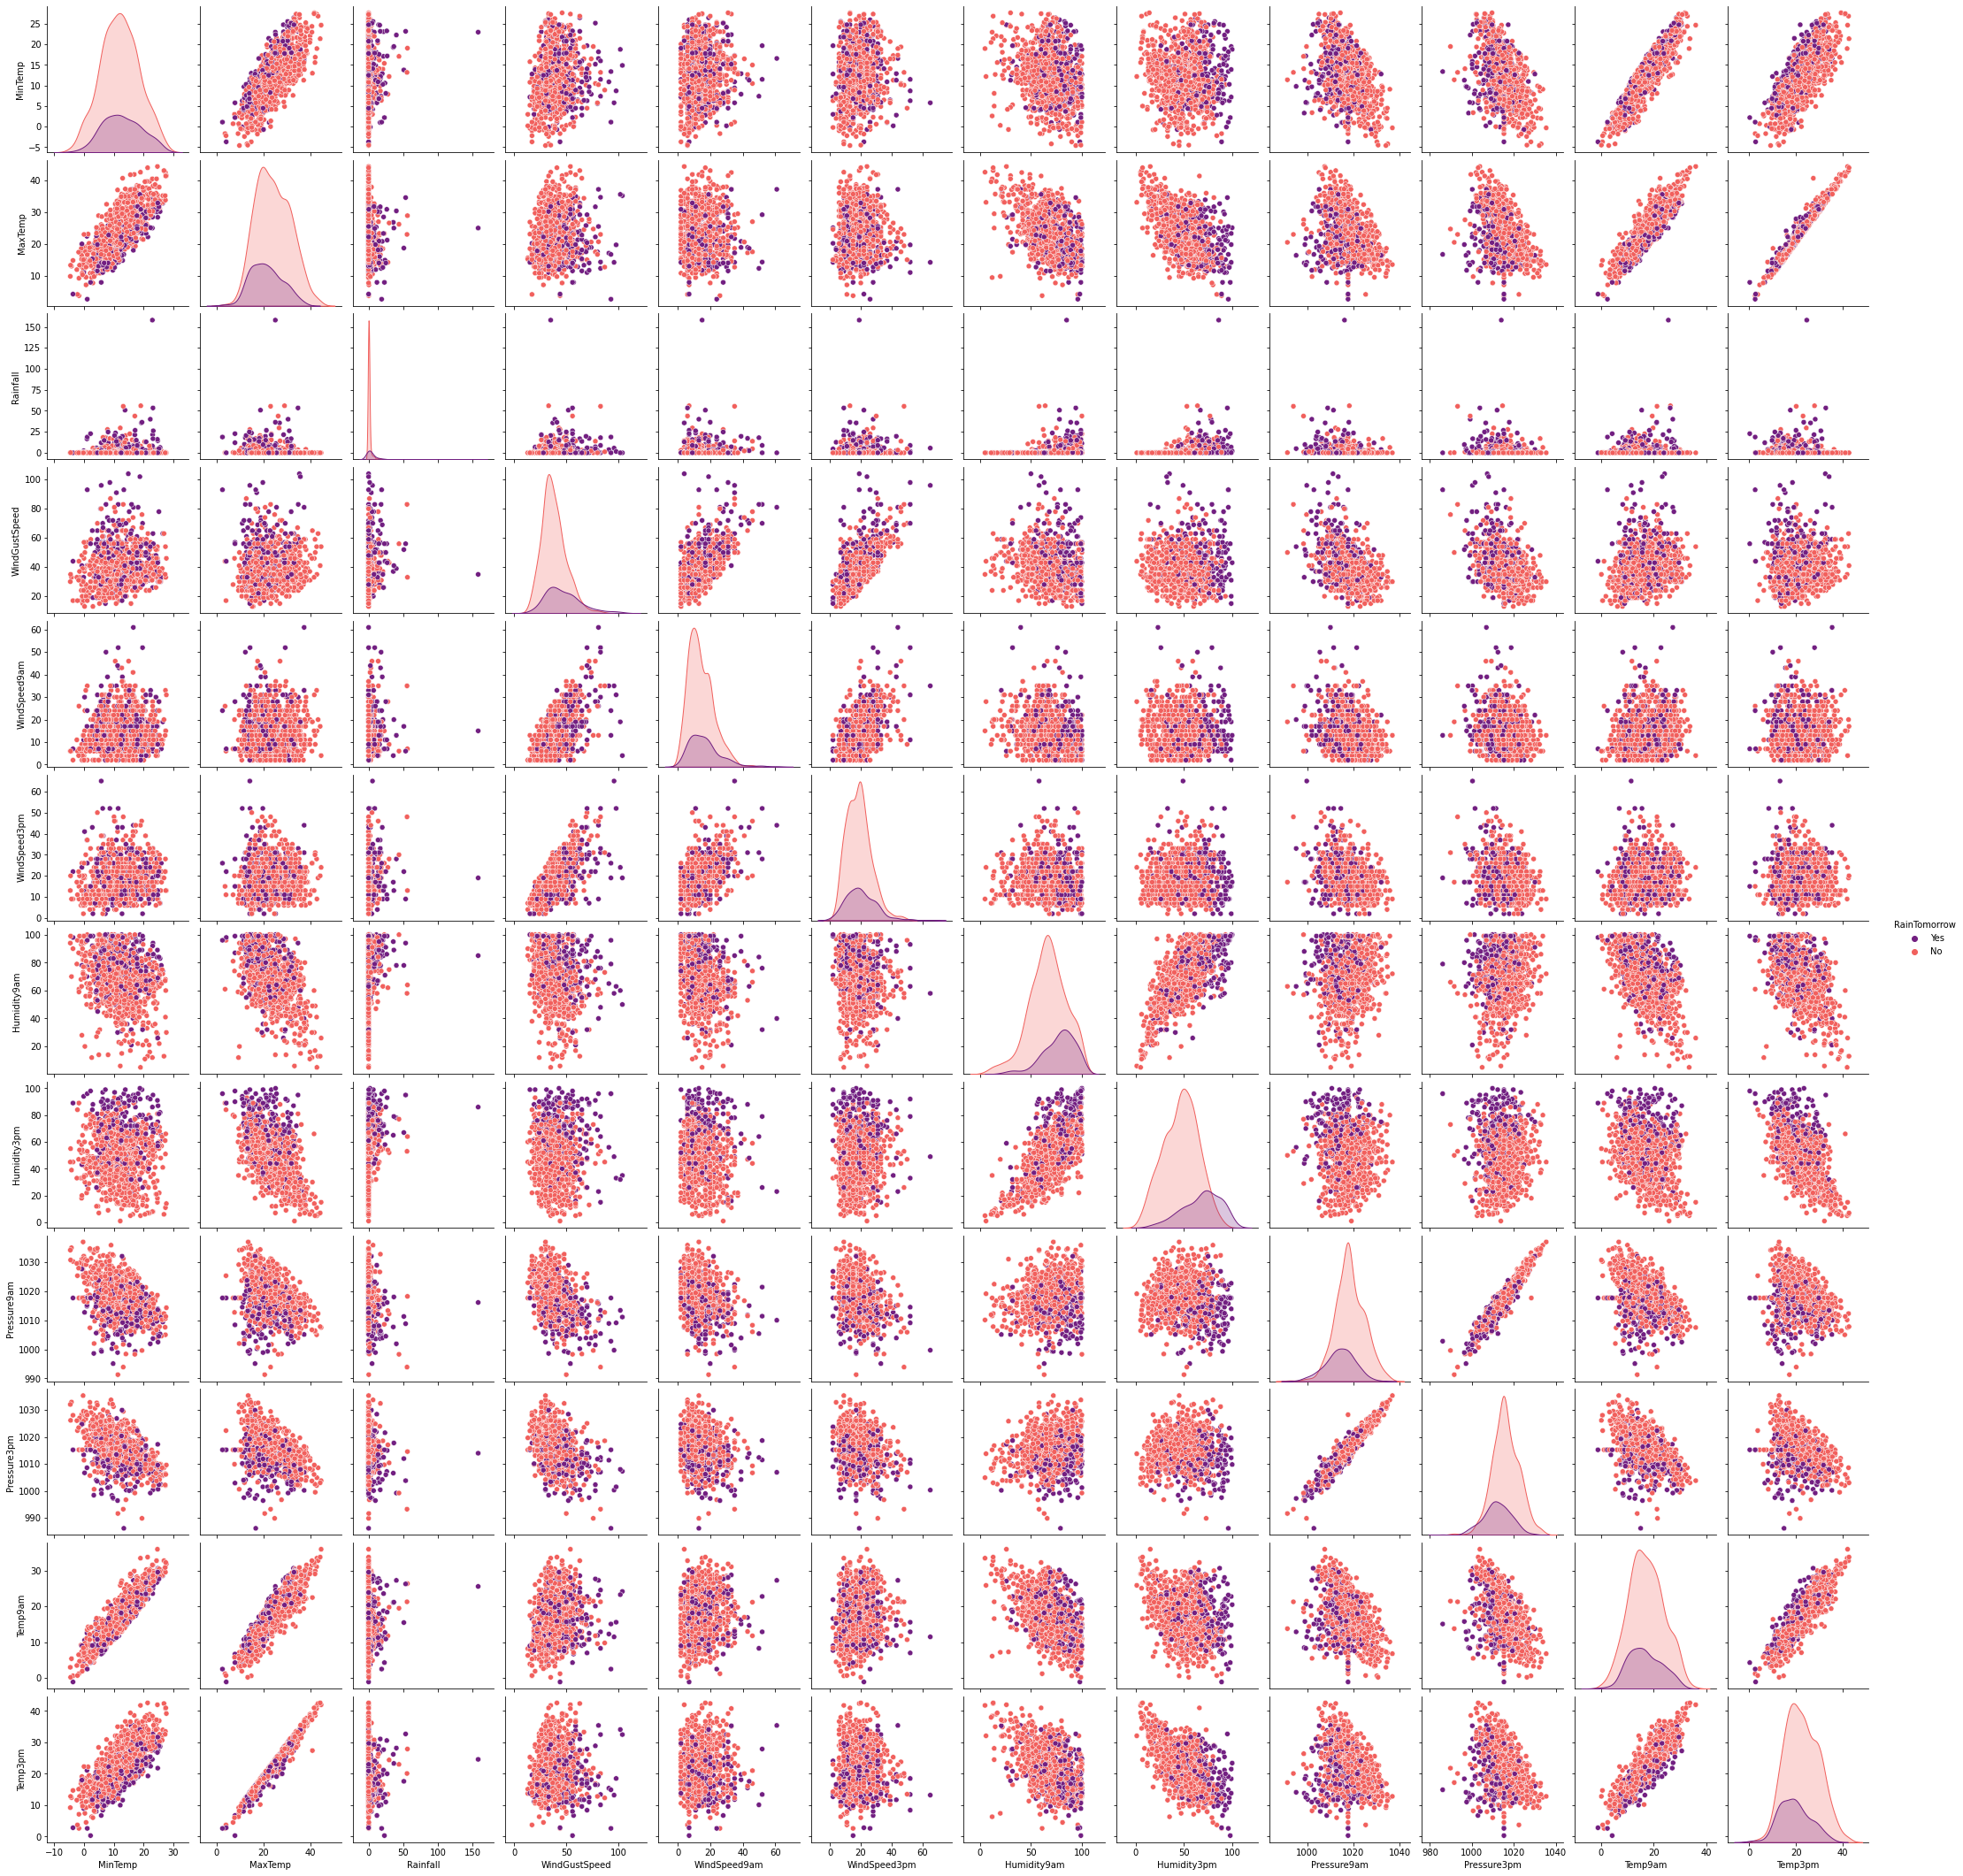

In [67]:
# rough trends and correlation between columns. 
sns.pairplot(df.sample(1000, random_state=101), hue='RainTomorrow',palette='magma')

## Converting categorical data into numerical

In [68]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No,12
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No,12
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No,12
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No,12
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No,12


In [69]:
# Using Map function to convert yes/no responses to 1/0. 
df['RainToday'] = df['RainToday'].map({'No':0, 'Yes':1})
df['RainTomorrow'] = df['RainTomorrow'].map({'No':0, 'Yes':1})

In [70]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0,12
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0,12
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0,12
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0,12
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0,12


In [71]:
# columns to apply dummies method: Location, WindGustDir, WindDir9am, WindDir3pm, RainToday
cols = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

In [72]:
locations = pd.get_dummies(df['Location'], drop_first=True)
W9 = pd.get_dummies(df['WindDir9am'], drop_first=True)
W3 = pd.get_dummies(df['WindDir3pm'], drop_first=True)
WindGust = pd.get_dummies(df['WindGustDir'], drop_first=True)

In [73]:
df = pd.concat([df, locations, W3, W9, WindGust], axis=1)

In [74]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,...,0,0,0,0,0,0,0,1,0,0
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,...,0,0,0,0,0,0,0,0,1,0
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,...,0,0,0,0,0,0,0,0,0,1
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,...,0,0,0,0,0,0,0,0,0,0
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,...,0,0,0,0,0,0,0,1,0,0


In [75]:
df.drop(cols, axis=1, inplace=True)

## Linearn Regression

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report

In [77]:
# Separating features and target. 
X = df.drop('RainTomorrow', axis=1, )
y = df['RainTomorrow']

In [78]:
# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [79]:
# Fitting
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [80]:
# Our predictions
predictions = lm.predict(X_test)
np.round(abs(predictions))

array([0., 1., 0., ..., 0., 0., 1.])

In [81]:
# Final Results/Report
print(classification_report(y_test, np.round(abs(predictions))))

              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91     38004
         1.0       0.77      0.47      0.58     10712
         2.0       0.00      0.00      0.00         0

    accuracy                           0.85     48716
   macro avg       0.54      0.48      0.50     48716
weighted avg       0.84      0.85      0.84     48716



C:\Users\mehul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mehul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mehul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarni

In [82]:
# Accuracy Score
from sklearn.metrics import accuracy_score
print("Accuracy Score: {}".format(accuracy_score(y_test,np.round(abs(predictions)))))

Accuracy Score: 0.8517119632153707


## Comparison with other algorithms' performance. 

In [83]:
def evaluate(model):
    model.fit(X_train,y_train)
    accuracy=model.score(X_test,y_test)
    
    print('Model in use = ',model)
    print('Corresponding accuracy = ',accuracy)

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

lr=LogisticRegression()
dt=DecisionTreeClassifier(max_depth=6)
rf=RandomForestClassifier(max_samples=0.9)
knn=KNeighborsClassifier(n_neighbors=5)

models=[lr,dt,rf,knn]

for model in models:
    evaluate(model)

C:\Users\mehul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model in use =  LogisticRegression()
Corresponding accuracy =  0.8445685195828886
Model in use =  DecisionTreeClassifier(max_depth=6)
Corresponding accuracy =  0.8428442400853929
Model in use =  RandomForestClassifier(max_samples=0.9)
Corresponding accuracy =  0.8579111585516053
Model in use =  KNeighborsClassifier()
Corresponding accuracy =  0.8389440840791527
